### Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi, tan, sympify

In [2]:
# Definir la variable independiente 
t = symbols('t')

# Esta es una funcion que depende de t
x = Function('x')(t)

#funcion_m = sin(t)
funcion_m = (2*t*(1+x**2))
#funcion_m = x
# Definir la ecuación diferencial (Homogenea)
edo = x.diff(t) - funcion_m
# Resolver la ecuación diferencial y darle su valor inicial

solucion = dsolve(edo, x, ics={x.subs(t, 0): 1})
solucion

Eq(x(t), tan(t**2 + pi/4))

In [3]:
numero_iteraciones3 = 8
numero_iteraciones1 = 80
numero_iteraciones01 = 800

In [4]:
paso_inicial_T = -0.4
paso_final_T = 0.8
paso_inicial_X = 1.384868848732684

In [5]:
delta_T_3 = (paso_final_T - paso_inicial_T)/numero_iteraciones3
print(delta_T_3)
delta_T_1 = (paso_final_T - paso_inicial_T)/numero_iteraciones1
print(delta_T_1)
delta_T_03 = (paso_final_T - paso_inicial_T)/numero_iteraciones01
print(delta_T_03)

0.15000000000000002
0.015000000000000003
0.0015000000000000002


### Iniciemos con la solucion exacta

In [6]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones3):
    t_i = (vector_T_funcion_real[iteracion] + delta_T_3) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [solucion.rhs.subs({t: valor}) for valor in list(vector_T_funcion_real)]

In [7]:
vector_f_solucion

[tan(0.16 + pi/4),
 tan(0.0625 + pi/4),
 tan(0.01 + pi/4),
 tan(0.0025 + pi/4),
 tan(0.04 + pi/4),
 tan(0.1225 + pi/4),
 tan(0.25 + pi/4),
 tan(0.4225 + pi/4),
 tan(0.64 + pi/4)]

### Definición de las variables simbolicas

In [8]:
t, x = sp.symbols('t x')

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [9]:
func_f = sp.sympify("2*t*(1+x^2)")
func_f

2*t*(x**2 + 1)

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

In [10]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk_03 = np.array([paso_inicial_T])
vector_X_rk_03 = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones3):
    dic_eval_rk_m = {
        t: vector_T_rk_03[iteracion],
        x: vector_X_rk_03[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk_03[iteracion] + (delta_T_3/2),
        x: vector_X_rk_03[iteracion] + m_i * (delta_T_3/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk_03[iteracion] + (delta_T_3/2),
        x: vector_X_rk_03[iteracion] + n_i * (delta_T_3/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk_03[iteracion] + delta_T_3
    vector_T_rk_03 = np.append(vector_T_rk_03, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk_03[iteracion + 1] + (delta_T_3/2),
        x: vector_X_rk_03[iteracion] + p_i * (delta_T_3)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk_03[iteracion] + (delta_T_3/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk_03 = np.append(vector_X_rk_03, x_i)

In [11]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk_01 = np.array([paso_inicial_T])
vector_X_rk_01 = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones1):
    dic_eval_rk_m = {
        t: vector_T_rk_01[iteracion],
        x: vector_X_rk_01[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk_01[iteracion] + (delta_T_1/2),
        x: vector_X_rk_01[iteracion] + m_i * (delta_T_1/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk_01[iteracion] + (delta_T_1/2),
        x: vector_X_rk_01[iteracion] + n_i * (delta_T_1/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk_01[iteracion] + delta_T_1
    vector_T_rk_01 = np.append(vector_T_rk_01, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk_01[iteracion + 1] + (delta_T_1/2),
        x: vector_X_rk_01[iteracion] + p_i * (delta_T_1)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk_01[iteracion] + (delta_T_1/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk_01 = np.append(vector_X_rk_01, x_i)

In [12]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk_003 = np.array([paso_inicial_T])
vector_X_rk_003 = np.array([paso_inicial_X]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones01):
    dic_eval_rk_m = {
        t: vector_T_rk_003[iteracion],
        x: vector_X_rk_003[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk_003[iteracion] + (delta_T_03/2),
        x: vector_X_rk_003[iteracion] + m_i * (delta_T_03/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk_003[iteracion] + (delta_T_03/2),
        x: vector_X_rk_003[iteracion] + n_i * (delta_T_03/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk_003[iteracion] + delta_T_03
    vector_T_rk_003 = np.append(vector_T_rk_003, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk_003[iteracion + 1] + (delta_T_03/2),
        x: vector_X_rk_003[iteracion] + p_i * (delta_T_03)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk_003[iteracion] + (delta_T_03/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk_003 = np.append(vector_X_rk_003, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [13]:
len(vector_T_funcion_real)

9

In [14]:
vector_f_solucion[8]

tan(0.64 + pi/4)

In [15]:
vector_X_rk_03[8]

8.25187564600614

In [16]:
vector_X_rk_01[80]

6.97498005570270

In [17]:
vector_X_rk_003[800]

6.84345190565971

### Grafica trajando

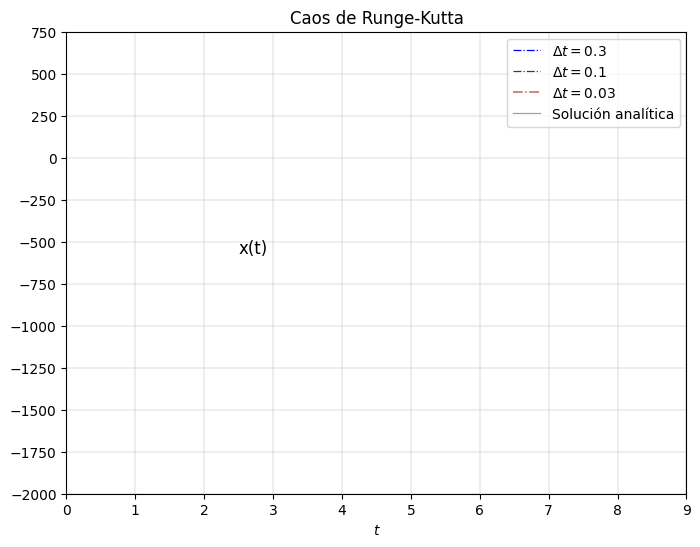

In [18]:
plt.figure(figsize=(8, 6))
plt.text(2.5, -570, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(0, 10, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-2000, 1000, 250))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.xlabel('$t$')
plt.plot(
    vector_T_rk_03[250:],
    vector_X_rk_03[250:],
    label="$\Delta t = 0.3$",
    color='blue',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk_01[900:],
    vector_X_rk_01[900:],
    label="$\Delta t = 0.1$",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk_003[2500:],
    vector_X_rk_003[2500:],
    label="$\Delta t = 0.03$",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real[230:],
    vector_f_solucion[230:],
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("Caos de Runge-Kutta")
plt.savefig("Caos de Runge-Kutta.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

### Grafica inicial

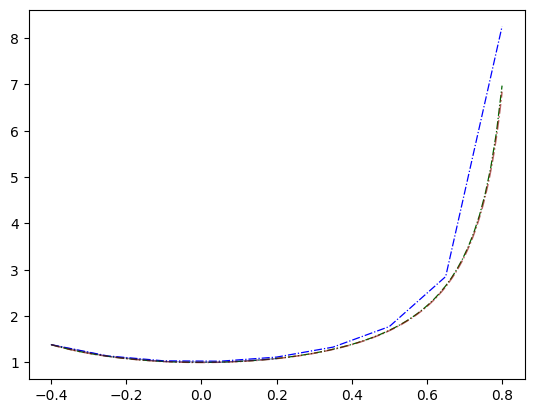

In [19]:
plt.plot(
    vector_T_rk_03,
    vector_X_rk_03,
    label="0.3",
    color='blue',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk_01,
    vector_X_rk_01,
    label="0.301",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk_003,
    vector_X_rk_003,
    label="0.302",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real[:5],
    vector_f_solucion[:5],
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.show()